In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)


In [2]:
import os
CWD_PATH = os.getcwd()

# Read CSV train data file into DataFrame
train_df = pd.read_csv(CWD_PATH+'/allTitanic/train.csv')

# Read CSV test data file into DataFrame
test_df = pd.read_csv(CWD_PATH+'/allTitanic/test.csv')

# preview train data
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [4]:
# preview test data
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


In [6]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


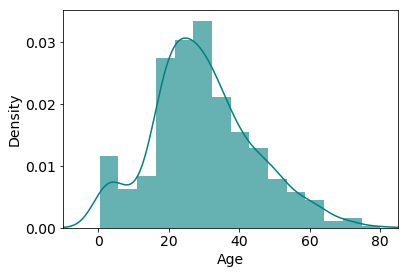

In [8]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [9]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [11]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [12]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [14]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [15]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# preview adjusted train data
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

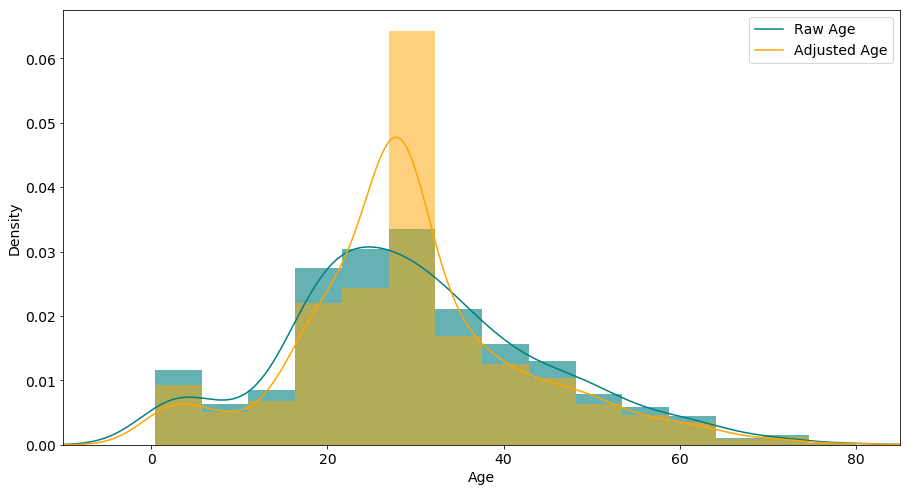

In [17]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [18]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [19]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [20]:
training

PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
5              6         0                                   Moran, Mr. James   
6              7         0                            McCarthy, Mr. Timothy J   
7              8         0                     Palsson, Master. Gosta Leonard   
8              9         1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10         1                Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1                    Sandstrom, Miss. Marguerite Rut   
11            12         1                           Bonnell, Miss. Elizabeth   
12            13         0                     Saundercock, Mr. William Henry   
13            14         0                        Andersson, Mr. Anders Johan   
14            15         0               Vestrom, Miss. Hulda Amanda Adolfina   
15            16         1                   Hewlett, Mrs. (Mary D Kingcome)    
16            17         0                               Rice, Master. Eugene   
17            18         1                       Williams, Mr. Charles Eugene   
18            19         0  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19            20         1                            Masselmani, Mrs. Fatima   
20            21         0                               Fynney, Mr. Joseph J   
21            22         1                              Beesley, Mr. Lawrence   
22            23         1                        McGowan, Miss. Anna "Annie"   
23            24         1                       Sloper, Mr. William Thompson   
24            25         0                      Palsson, Miss. Torborg Danira   
25            26         1  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26            27         0                            Emir, Mr. Farred Chehab   
27            28         0                     Fortune, Mr. Charles Alexander   
28            29         1                      O'Dwyer, Miss. Ellen "Nellie"   
29            30         0                                Todoroff, Mr. Lalio   
..           ...       ...                                                ...   
861          862         0                        Giles, Mr. Frederick Edward   
862          863         1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863          864         0                  Sage, Miss. Dorothy Edith "Dolly"   
864          865         0                             Gill, Mr. John William   
865          866         1                           Bystrom, Mrs. (Karolina)   
866          867         1                       Duran y More, Miss. Asuncion   
867          868         0               Roebling, Mr. Washington Augustus II   
868          869         0                        van Melkebeke, Mr. Philemon   
869          870         1                    Johnson, Master. Harold Theodor   
870          871         0                                  Balkic, Mr. Cerin   
871          872         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872          873         0                           Carlsson, Mr. Frans Olof   
873          874         0                        Vander Cruyssen, Mr. Victor   
874          875         1              Abelson, Mrs. Samuel (Hannah Wizosky)   
875          876         1                   Najib, Miss. Adele Kiamie "Jane"   
876          877         0                      Gustafsson, Mr. Alfred Ossian   
877          878         0                               Petroff, Mr. Nedelio   
878          879         0          

In [21]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

Survived   Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0   7.2500            0         0         0         1   
1         1  38.0  71.2833            0         1         0         0   
2         1  26.0   7.9250            1         0         0         1   
3         1  35.0  53.1000            0         1         0         0   
4         0  35.0   8.0500            1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           0           0           1         1  
1           1           0           0         0  
2           0           0           1         0  
3           0           0           1         0  
4           0           0           1         1

In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
print('The number of samples into the train data is {}.'.format(test_df.shape[0]))

The number of samples into the train data is 418.


In [24]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0  34.5   7.8292            1         0         0         1           0   
1  47.0   7.0000            0         0         0         1           0   
2  62.0   9.6875            1         0         1         0           0   
3  27.0   8.6625            1         0         0         1           0   
4  22.0  12.2875            0         0         0         1           0   

   Embarked_Q  Embarked_S  Sex_male  
0           1           0         1  
1           0           1         0  
2           1           0         1  
3           0           1         1  
4           0           1         0

In [25]:
training.isnull().sum()

Survived       0
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [26]:
final_test.isnull().sum()

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [27]:
final_train.head()

Survived   Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0   7.2500            0         0         0         1   
1         1  38.0  71.2833            0         1         0         0   
2         1  26.0   7.9250            1         0         0         1   
3         1  35.0  53.1000            0         1         0         0   
4         0  35.0   8.0500            1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           0           0           1         1  
1           1           0           0         0  
2           0           0           1         0  
3           0           0           1         0  
4           0           0           1         1

In [28]:
from sklearn.linear_model import LogisticRegression

cols = ["Age","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X = final_train[cols]
y = final_train['Survived']

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

Accuracy score:
0.782122905028


In [30]:
X_test= final_test[cols]
y_test_pred = model.predict(X_test)

In [31]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,